In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [44]:
df = pd.read_csv('Churn_Modelling.csv')

In [45]:
df.head()
# exited 1 - left
# 0 -  still present with the bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [49]:
# imbalance data set
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [50]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [51]:
# perform one one hot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [52]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [53]:
# Splitting train and test data
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
# scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [17]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 7.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 18.8 MB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 14.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.2 MB/s eta 0:00:00
 

In [55]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [29]:
X_train.shape

(8000, 10)

In Keras we can two type of model, One is seqential and other is Non - Sequential

In Sequential we have three layers
- Input layer
- Hidden Layer
- output layer

In [56]:
model = Sequential()

# First hidden layer so need to mention about the input nodes
model.add(Dense(3,activation='sigmoid',input_dim=11))


# output layer having one perceptron
model.add(Dense(1,activation='sigmoid'))

/Users/vinaymittal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


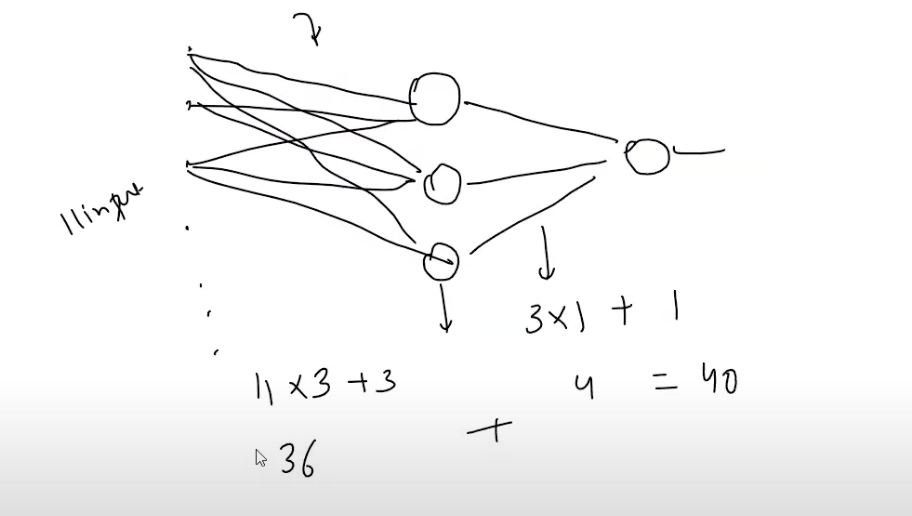

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
# need to mention loss function
# Optimizer : Gradient descent algo : Adam
# loss function : second name log loss
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [66]:
history = model.fit(X_train_trf,y_train,
                    #
                    batch_size=50,
                    epochs=100,
                    verbose=1,
                    # Splitting the data taken into 80 and 20
                    # evalulating performance with 20 percent
                    validation_split=0.2)
"""
We need to make sure that the accurcy of training and validation accuracy is indreasing together. If at some point we observe that only training accuracy is increasing
but not validation accuradcy is not increasing that means at that point the data is being overfitted.
"""

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8014 - loss: 0.4439 - val_accuracy: 0.7969 - val_loss: 0.4455
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7992 - loss: 0.4420 - val_accuracy: 0.7994 - val_loss: 0.4423
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.8043 - loss: 0.4377 - val_accuracy: 0.8050 - val_loss: 0.4397
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8050 - loss: 0.4364 - val_accuracy: 0.8106 - val_loss: 0.4376
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8063 - loss: 0.4341 - val_accuracy: 0.8138 - val_loss: 0.4357
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8178 - loss: 0.4253 - val_accuracy: 0.8131 - val_loss: 0.4342
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8102 - loss: 0.4329 - val_accuracy: 0.8125 - val_loss: 0.4330
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8126 - loss: 0

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.8328 - loss: 0.4051 - val_accuracy: 0.8275 - val_loss: 0.4117
Epoch 51/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8299 - loss: 0.4086 - val_accuracy: 0.8269 - val_loss: 0.4117
Epoch 52/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8257 - loss: 0.4095 - val_accuracy: 0.8275 - val_loss: 0.4117
Epoch 53/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8357 - loss: 0.4003 - val_accuracy: 0.8275 - val_loss: 0.4116
Epoch 54/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8367 - loss: 0.4033 - val_accuracy: 0.8275 - val_loss: 0.4115
Epoch 55/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8382 - loss: 0.4001 - val_accuracy: 0.8275 - val_loss: 0.4115
Epoch 56/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8287 - loss: 0.4114 - val_accuracy: 0.8275 - val_loss: 0.4115
Epoch 57/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8314 - loss: 0.4058

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8243 - loss: 0.4175 - val_accuracy: 0.8288 - val_loss: 0.4111
Epoch 100/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8283 - loss: 0.4094 - val_accuracy: 0.8275 - val_loss: 0.4110


In [64]:
y_pred = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


In [65]:
y_pred

array([[0.31826413],
       [0.3237513 ],
       [0.22038317],
       ...,
       [0.1588887 ],
       [0.20345469],
       [0.26777783]], dtype=float32)

In [74]:
# Code to fetch the weight based on the layer
model.layers[0].get_weights()

[array([[-0.16944396, -0.19608432,  0.01725796],
        [ 3.1722147 ,  3.2704618 , -0.2145986 ],
        [-0.13111356, -0.40780595,  0.01522885],
        [ 0.0679924 , -0.05502314, -0.2306827 ],
        [-0.00663322,  0.05884076,  0.2448658 ],
        [-0.03754273, -0.07406898, -0.01054969],
        [ 1.0212669 ,  1.3561618 ,  1.7853669 ],
        [-0.1544893 , -0.172525  , -0.19323376],
        [ 0.31536826,  0.10034647, -0.7657281 ],
        [ 0.03086841,  0.05236848, -0.14506887],
        [-0.23565598, -0.18038236,  0.43751976]], dtype=float32),
 array([-0.5837109, -0.6153578,  0.8819602], dtype=float32)]

In [75]:
model.layers[1].get_weights()

[array([[ 1.4566525],
        [ 1.2522353],
        [-2.8796577]], dtype=float32),
 array([-0.9964172], dtype=float32)]

In [78]:
y_pred

array([[0.31826413],
       [0.3237513 ],
       [0.22038317],
       ...,
       [0.1588887 ],
       [0.20345469],
       [0.26777783]], dtype=float32)

In [79]:
# This is probability value need to convert it into 0 and 1
# we will give the threshold as 0.5. but practically we
# need to use ROC and AUC curve to find the threshold
y_final = np.where(y_pred >0.5, 1, 0)

In [19]:
# 
y_pred = y_pred.argmax(axis=-1)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_final)

0.799

In [83]:
# We get a dictionary
history.history

{'accuracy': [0.7973437309265137,
  0.800000011920929,
  0.8021875023841858,
  0.8051562309265137,
  0.8073437213897705,
  0.809374988079071,
  0.8109375238418579,
  0.8121874928474426,
  0.811718761920929,
  0.8123437762260437,
  0.8143749833106995,
  0.8146874904632568,
  0.8168749809265137,
  0.8167187571525574,
  0.8168749809265137,
  0.817187488079071,
  0.8178125023841858,
  0.8185937404632568,
  0.8189062476158142,
  0.8192187547683716,
  0.8201562762260437,
  0.8207812309265137,
  0.8215625286102295,
  0.8231250047683716,
  0.8251562714576721,
  0.8245312571525574,
  0.8253124952316284,
  0.8254687786102295,
  0.8262500166893005,
  0.8265625238418579,
  0.8268749713897705,
  0.8274999856948853,
  0.828125,
  0.8296874761581421,
  0.8284375071525574,
  0.8306249976158142,
  0.8299999833106995,
  0.831250011920929,
  0.8309375047683716,
  0.8303124904632568,
  0.8310937285423279,
  0.8310937285423279,
  0.8310937285423279,
  0.8314062356948853,
  0.8317187428474426,
  0.831718742

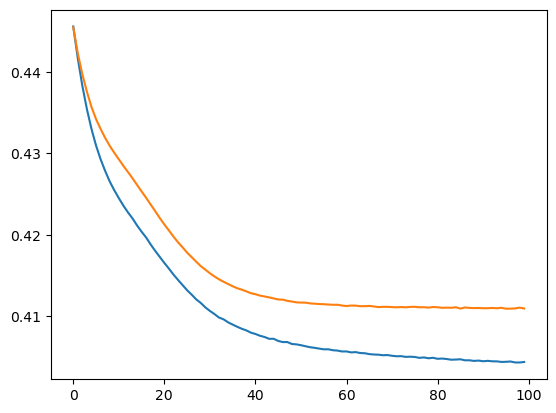

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

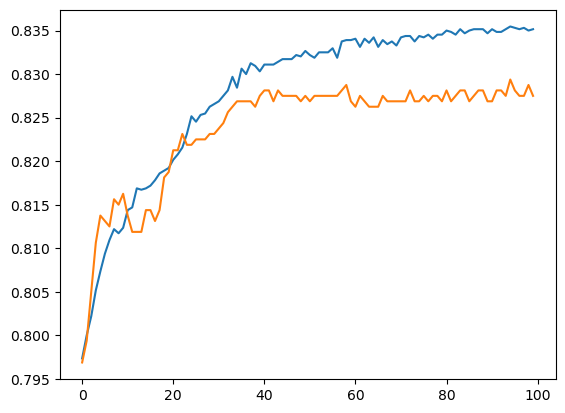

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])